# Eigen-decomposition of human sperm sex chromosome separated samples

Here, we prep the E1 values of the data from the human sperm sex chromosome separated samples.

In [2]:
import bioframe
import cooler
import numpy as np
import pandas as pd
import os

sperm_X = "../steps/merged/sperm_X.merged.mcool"
sperm_Y = "../steps/merged/sperm_Y.merged.mcool"

In [3]:
# Make viewframes
assembly = "GRCh38"
os.makedirs("../steps/views/", exist_ok=True)
centromeres = bioframe.fetch_centromeres(assembly)
chromsizes = bioframe.fetch_chromsizes(assembly)
chromarms = bioframe.make_chromarms(chromsizes, centromeres)
view_x = bioframe.make_viewframe(chromarms).query('chrom == "chrX"')
view_y = bioframe.make_viewframe(chromarms).query('chrom == "chrY"')
view_x.to_csv(f"../steps/views/view_{assembly}_X_chromarms.tsv",  index=False, header=False, sep='\t')
view_y.to_csv(f"../steps/views/view_{assembly}_Y_chromarms.tsv",  index=False, header=False, sep='\t')

# Just for views
pd.concat([view_x, view_y])

,chrom,start,end,name
44,chrX,0,61000000,chrX_p
45,chrX,61000000,156040895,chrX_q
46,chrY,0,10400000,chrY_p
47,chrY,10400000,57227415,chrY_q


## Calculate the GC contetn coverage


In [ ]:
%%bash 

gzip -d ../data/bins/*.gz

REF=../steps/reference/hg38.fa
mkdir -p ../steps/bins
for res in 1000 5000 10000 50000 100000; do
    echo $res
    BINS=../data/bins/hg38.bins.${res}.tsv
    GC_OUT=../steps/bins/hg38.gc.${res}.tsv
    cooltools genome gc $BINS $REF > $GC_OUT
done

# %%bash 

# REF=../steps/references/hg38.fa

# mkdir -p ../steps/bins
# for res in 1000 5000 10000 50000 100000; do
#     echo res
#     BINS=../steps/bins/hg38.bins.${res}.tsv
#     GC_OUT=../steps/bins/hg38.gc.${res}.tsv
#     cooltools genome gc $BINS $REF > $GC_OUT
# done

1000



Aborted!


## Do eigendecomposition

In [ ]:
%%bash 

# Find multires coolers
SPERM_X="../steps/merged/sperm_X.merged.mcool"
SPERM_Y="../steps/merged/sperm_Y.merged.mcool"

# Define the viewframe
VIEW_X=../data/views/view_GRCh38_X_chromarms.tsv
VIEW_Y=../data/views/view_GRCh38_Y_chromarms.tsv

# Names
SAMPLE_X=$(basename $SPERM_X .merged.mcool)
SAMPLE_Y=$(basename $SPERM_Y .merged.mcool)

echo $SAMPLE_X
for res in 1000 5000 10000 50000 100000 500000; do
    echo $res
    COOLER=$SPERM_X::resolutions/$res
    GC_BINS=../data/bins/hg38.gc.${res}.tsv
    EIGS_OUT=../data/eigs/$SAMPLE_X.eigs.$res

    echo -ne ' -' $res OK
    cooltools eigs-cis -o $EIGS_OUT --view $VIEW_X --phasing-track $GC_BINS --n-eigs 3 $COOLER

done
echo ""

echo $SAMPLE_Y
for res in 1000 5000 10000 50000 100000 500000; do
    echo $res
    COOLER=$SPERM_Y::resolutions/$res
    GC_BINS=../data/bins/hg38.gc.${res}.tsv
    EIGS_OUT=../data/eigs/$SAMPLE_Y.eigs.$res

    echo -ne ' -' $res OK
    cooltools eigs-cis -o $EIGS_OUT --view $VIEW_Y --phasing-track $GC_BINS --n-eigs 3 $COOLER

done
echo ""

echo All done

sperm_X
1000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 1000 OK5000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 5000 OK10000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 10000 OK50000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 50000 OK100000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 100000 OK500000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 500000 OK
sperm_Y
1000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 1000 OK5000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 5000 OK10000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 10000 OK50000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 50000 OK100000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 100000 OK500000


/home/sojern/miniconda3/envs/hic/lib/python3.12/site-packages/cooltools/cli/eigs_cis.py:143: FutureWarning: The 'verbose' keyword in pd.read_table is deprecated and will be removed in a future version.
  track_df = pd.read_table(


 - 500000 OK
All done


In [ ]:

sperm_X_dict = {
    res: pd.read_csv(df_eig.query('tissue == "sperm_X" and resolution == @res')['path'].values[0], sep="\t", header=0) for res in df_eig['resolution'].unique()
}


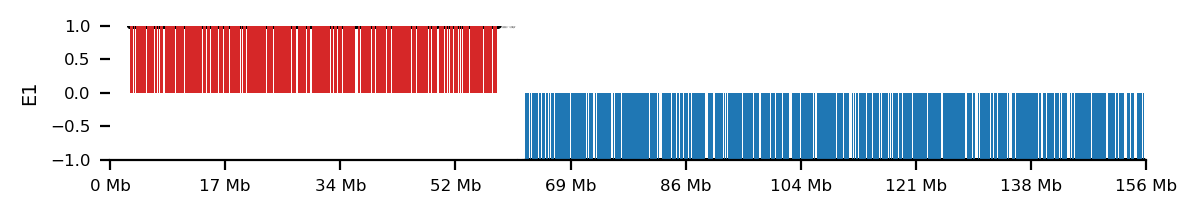

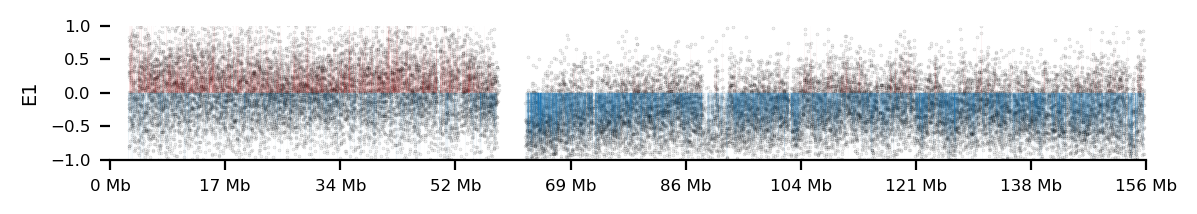

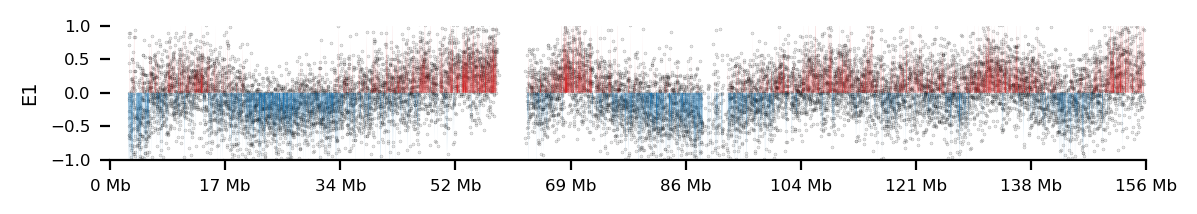

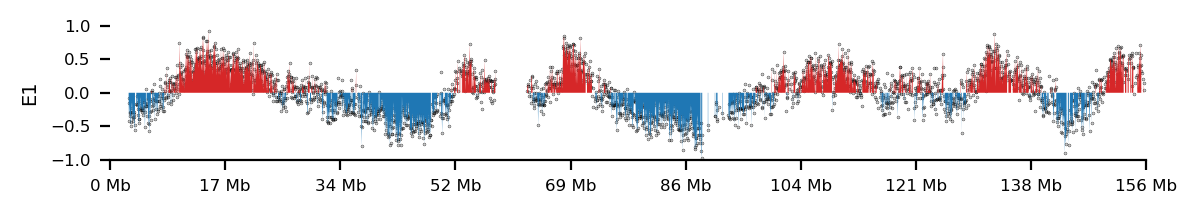

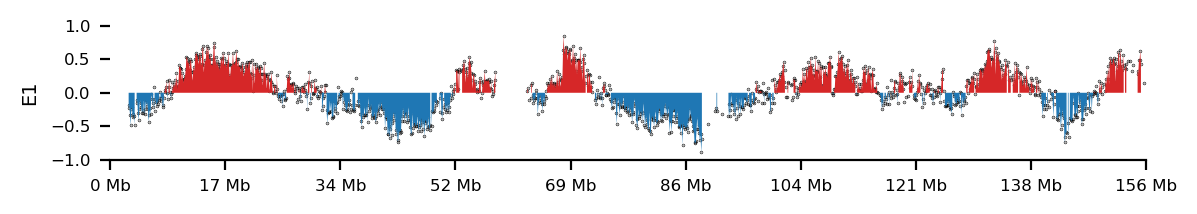

In [ ]:
#| echo: false
#| label: "fig-e1-sperm-x"
#| fig-cap: "E1 eigenvector for human GRCh37 sperm at different resolutions. The E1 eigenvector is the first eigenvector of the covariance matrix of the Hi-C contact matrix, and it captures the dominant mode of variation in the data. The classical definitions, A: E1 > 0 and B: E1 < 0, are shown in red and blue, respectively. E1 values are overlayed as scatter."
#| fig-subcap:
#|  - "1kb resolution"
#|  - "5kb resolution"
#|  - "10kb resolution"
#|  - "50kb resolution"
#|  - "100kb resolution"
#| layout-ncol: 1

alpha_list = [0.2, 0.2, 0.3, 0.7, 0.9] # Adjusted alpha for scatter points

for alpha,res in zip(alpha_list,['1000', '5000', '10000', '50000', '100000']):
    plot_eigenvectors(sperm_X_dict[res], 
                      title=None,
                      scatter=True,
                      scatter_alpha=alpha)

#### Check the valid interaction counts

In [ ]:
import cooler
import glob
import os

mclrs = glob.glob("../../data/human_sperm_haplo_seperated/sperm_X.merged.mcool")
clrs = [f"{mcl}::/resolutions/100000" for mcl in mclrs]

for clr in clrs:
    tmp_clr = cooler.Cooler(clr)
    print(f"""\
{os.path.basename(clr.split('::')[0])}:
    n_chrX contacts: {tmp_clr.pixels().fetch("chrX")['count'].sum():,}\
""")
    


sperm_X.merged.mcool:
    n_chrX contacts: 3,493,029


## Goal

Here, we compare chromosome 8 of the human genome from X or Y-bearing sperm.

1) Obtain eigenvector 1 (E1 track) 

NEXT NOTEBOOK

2) apply pymc model (train on data)
3) obtain confidence intervals
4) quantify differences

In [ ]:
import cooler
import cooltools
import bioframe
import numpy as np
import pandas as pd

# Chosen resolution
resolution = 10_000

clrX = cooler.Cooler(f"../steps/merged/sperm_X.merged.mcool::resolutions/{resolution}")
clrY = cooler.Cooler(f"../steps/merged/sperm_Y.merged.mcool::resolutions/{resolution}")

# Read binned GC content
gc_cov = pd.read_csv(f"../data/bins/hg38.gc.{resolution}.tsv", sep="\t")

FileNotFoundError: [Errno 2] No such file or directory: '../data/bins/hg38.gc.10000.tsv'

In [ ]:
display(
    clrX.info,
    clrY.info,
    f"X: Hereof on chr8: {clrX.pixels().fetch('chr8')['count'].sum():,}",
    f"Y: Hereof on chr8: {clrY.pixels().fetch('chr8')['count'].sum():,}",
)
gc_cov[gc_cov['chrom']=='chr8'].head(10).style.format({})

{'bin-size': 10000,
 'bin-type': 'fixed',
 'creation-date': '2025-06-20T10:32:41.229391',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.10.2',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 310096,
 'nchroms': 194,
 'nnz': 86431442,
 'storage-mode': 'symmetric-upper',
 'sum': 94109833}

{'bin-size': 10000,
 'bin-type': 'fixed',
 'creation-date': '2025-06-20T10:31:55.858941',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.10.2',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 310096,
 'nchroms': 194,
 'nnz': 72020268,
 'storage-mode': 'symmetric-upper',
 'sum': 77836378}

'X: Hereof on chr8: 4,936,819'

'Y: Hereof on chr8: 4,238,557'

,chrom,start,end,GC
139138,chr8,0,10000,nan
139139,chr8,10000,20000,nan
139140,chr8,20000,30000,nan
139141,chr8,30000,40000,nan
139142,chr8,40000,50000,nan
139143,chr8,50000,60000,nan
139144,chr8,60000,70000,0.431600
139145,chr8,70000,80000,0.477500
139146,chr8,80000,90000,0.499200
139147,chr8,90000,100000,0.527600


In [ ]:
# Make viewframes
assembly = "GRCh38"
centromeres = bioframe.fetch_centromeres(assembly)
chromsizes = bioframe.fetch_chromsizes(assembly)
chromarms = bioframe.make_chromarms(chromsizes, centromeres)
view = bioframe.make_viewframe(chromarms).query('chrom == "chr8"').reset_index(drop=True)
view

,chrom,start,end,name
0,chr8,0,45200000,chr8_p
1,chr8,45200000,145138636,chr8_q


In [ ]:
# Make a sliding 10Mb viewframe (local-PCA) from @wang2019

chromsize_8 = chromsizes.loc["chr8"]

view_local = pd.DataFrame({
    "chrom": "chr8",
    "start": np.arange(0, chromsize_8-10_000_000, 10_000_000),
    "end": np.arange(10_000_000, chromsize_8, 10_000_000),
    "name": [f"chr8_{i}" for i in range(0, chromsize_8-10_000_000, 10_000_000)],
})
view_local

,chrom,start,end,name
0,chr8,0,10000000,chr8_0
1,chr8,10000000,20000000,chr8_10000000
2,chr8,20000000,30000000,chr8_20000000
3,chr8,30000000,40000000,chr8_30000000
4,chr8,40000000,50000000,chr8_40000000
5,chr8,50000000,60000000,chr8_50000000
6,chr8,60000000,70000000,chr8_60000000
7,chr8,70000000,80000000,chr8_70000000
8,chr8,80000000,90000000,chr8_80000000
9,chr8,90000000,100000000,chr8_90000000


## Eigendecomposition

In [ ]:
# Define a logger function to print to a log-file
from datetime import datetime

def log(msg, path=".11_chr8_compare_X_Y_eigs.log", add_newline=False, overwrite=False):
    now = datetime.now().strftime("%Y-%m-%d %H:%M")
    msg = f"{now}: {'\n' if add_newline else ''} {msg} \n"
    print(f"[LOG] {msg}")
    if overwrite:
        with open(path, "w") as f:
            f.write(msg)
    else:
        with open(path, "a") as f:
            f.write(msg)


# Reset the log file
log("Resetting log... \n", overwrite=True)

[LOG] 2025-08-30 01:16:  Resetting log... 
 



In [ ]:
import cooler
import cooltools
import bioframe
import numpy as np
import pandas as pd

# Chosen resolution
resolutions = [100_000, 50_000, 10_000]

# Chosen view

view = view
sort_metric = 'pearsonr' #'spearmanr'
log(f"Using view:\n{view}\n and sort_metric: {sort_metric}")

eig_dict = {}

for resolution in resolutions:
    eig_dict[resolution] = {}
    log(f"Processing resolution: {resolution} ")
    clrX = cooler.Cooler(f"../../data/human_sperm_haplo_seperated/sperm_X.merged.mcool::resolutions/{resolution}")
    clrY = cooler.Cooler(f"../../data/human_sperm_haplo_seperated/sperm_Y.merged.mcool::resolutions/{resolution}")

    # Read binned GC content
    gc_cov = pd.read_csv(f"../data/bins/hg38.gc.{resolution}.tsv", sep="\t")
    eigval_x, df_e1_x = cooltools.eigs_cis(
        clrX, 
        gc_cov,
        view, 
        n_eigs=3,
        sort_metric=sort_metric
    )

    eig_dict[resolution]['X'] = df_e1_x

    df_e1_x.to_csv(
        f"../data/eigs/sperm_X.chr8.eigs.{resolution}.arms.cis.vecs.tsv",
        sep="\t",
        index=False
    )

    log("X is done")

    eigval_y, df_e1_y = cooltools.eigs_cis(
        clrY, 
        gc_cov,
        view, 
        n_eigs=3,
        # sort_metric='spearmanr'
    )

    eig_dict[resolution]['Y'] = df_e1_y

    df_e1_y.to_csv(
        f"../data/eigs/sperm_Y.chr8.eigs.{resolution}.arms.cis.vecs.tsv",
        sep="\t",
        index=False
    )

    log("Y is done")


[LOG] 2025-08-30 01:16:  Using view:
  chrom     start        end    name
0  chr8         0   45200000  chr8_p
1  chr8  45200000  145138636  chr8_q
 and sort_metric: pearsonr 

[LOG] 2025-08-30 01:16:  Processing resolution: 100000  



[LOG] 2025-08-30 01:17:  X is done 



[LOG] 2025-08-30 01:17:  Y is done 

[LOG] 2025-08-30 01:17:  Processing resolution: 50000  



[LOG] 2025-08-30 01:17:  X is done 



[LOG] 2025-08-30 01:17:  Y is done 

[LOG] 2025-08-30 01:17:  Processing resolution: 10000  



[LOG] 2025-08-30 01:17:  X is done 



[LOG] 2025-08-30 01:17:  Y is done 



## Plot the E1's

In [ ]:
# Load the files back as the same dict to be able to start from here next time

import pandas as pd
import numpy as np

eig_dict = {}
resolutions = [10_000, 50_000, 100_000]

for resolution in resolutions:
    eig_dict[resolution] = {}
    eig_dict[resolution]['X'] = pd.read_csv(
        f"../data/eigs/sperm_X.chr8.eigs.{resolution}.arms.cis.vecs.tsv",
        sep="\t"
    )
    eig_dict[resolution]['Y'] = pd.read_csv(
        f"../data/eigs/sperm_Y.chr8.eigs.{resolution}.arms.cis.vecs.tsv",
        sep="\t"
    )



In [ ]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

plt.style.use('smaller.mplstyle')

import numpy as np


# Plot the E1 tracks saved in a dict

def plot_eigenvectors(eigenvectors, title=None, scatter=True, scatter_alpha=0.5):
    fig, ax = plt.subplots(figsize=(6, 1))

    x = eigenvectors['start']
    y = eigenvectors['E1']

    if scatter:
        ax.scatter(x, y, s=0.4, color='k', alpha=scatter_alpha, ec='None')
    ax.fill_between(x, y, where = y<0, color='tab:blue', lw=1, ec='None', step='post', interpolate=True)
    ax.fill_between(x, y, where = y>0, color='tab:red', lw=1, ec='None', step='post', interpolate=True) 
    ax.set_title(title)
    ax.set_ylabel('E1')
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-1,1)
    # ax.set_xlabel('Genomic Position (Mbp)')
    ticks = np.linspace(0, x.max(), num=10)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f'{int(t/1e6)} Mb' for t in ticks])
    ax.spines[:].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    plt.tight_layout()
    plt.show()



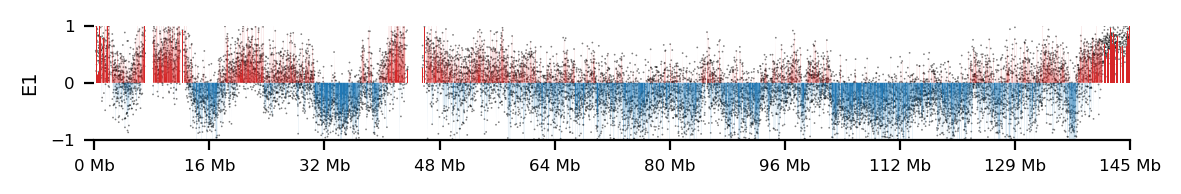

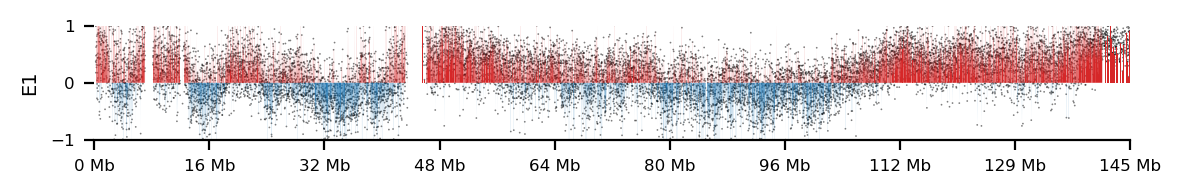

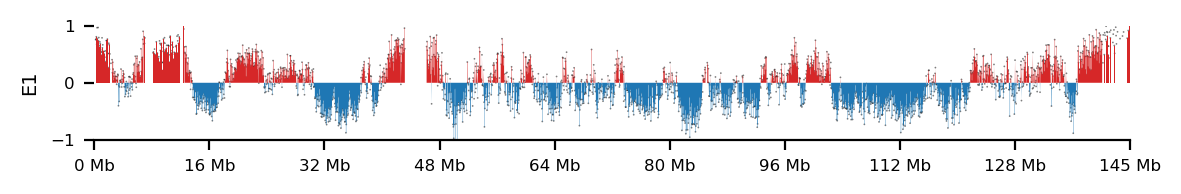

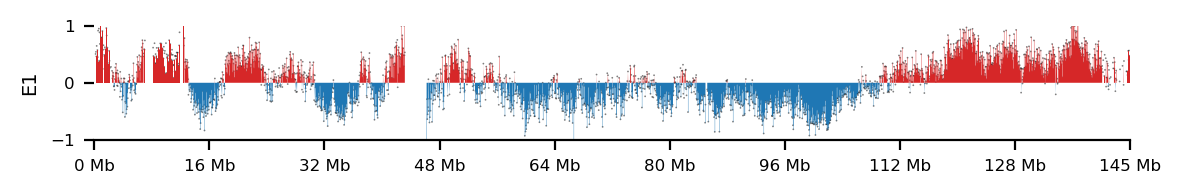

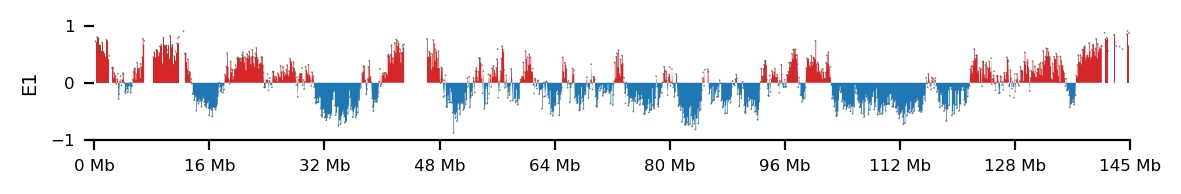

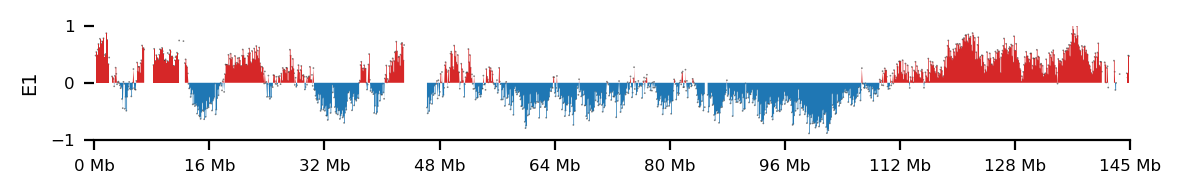

In [ ]:
#| echo: false
#| label: fig-chr8-eigs
#| fig-cap: "Comparing the eigenvector E1 for chr8 in X- and Y-bearing sperm at different resolutions. Here, the eigenvectors are re-sorted by their Spearman correlation with the GC content."
#| fig-scap: "Compare chr8 E1 for X/Y-bearing sperm"
#| fig-subcap:
#|  - "E1 for X-bearing sperm (10kb)"
#|  - "E1 for Y-bearing sperm (10kb)"
#|  - "E1 for X-bearing sperm (50kb)"
#|  - "E1 for Y-bearing sperm (50kb)"
#|  - "E1 for X-bearing sperm (100kb)"
#|  - "E1 for Y-bearing sperm (100kb)"
#| layout-ncol: 1


for res, dict in eig_dict.items():
    df_e1_x = dict['X']
    df_e1_y = dict['Y']
    
    plot_eigenvectors(df_e1_x, title=None)

    
    plot_eigenvectors(df_e1_y, title=None)


In [ ]:
log("All done!")

[LOG] 2025-08-30 01:17:  All done! 

